In [8]:
import numpy as np, pandas as pd, os
import seaborn as sns
import matplotlib.pyplot as plt
import os

from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

%matplotlib inline 

print(os.listdir("../input/"))

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

train.head()

['test.csv', 'train.csv', 'sample_submission.csv']


,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


In [11]:
train.shape

(262144, 258)

In [17]:
corr = train.corr()
pd.set_option('display.max_columns', len(corr.columns))

In [28]:
describe = corr[corr != 1.0].describe()

In [34]:
describe.loc["mean"].sort_values(ascending=False)

queasy-peach-bison-sumble                    0.000587
lousy-blue-buffalo-entropy                   0.000535
dorky-turquoise-maltese-important            0.000488
cozy-ochre-gorilla-gaussian                  0.000359
snippy-auburn-vole-learn                     0.000358
skanky-puce-discus-contributor               0.000358
hasty-blue-sheep-contributor                 0.000349
slimy-purple-gorilla-goose                   0.000341
chewy-myrtle-wasp-important                  0.000335
snoopy-red-zonkey-unsorted                   0.000331
baggy-champagne-capuchin-discard             0.000326
snippy-burgundy-leopard-expert               0.000325
surly-corn-tzu-kernel                        0.000321
blurry-wisteria-oyster-master                0.000317
hazy-champagne-duck-entropy                  0.000305
freaky-olive-insect-ordinal                  0.000301
snazzy-malachite-llama-unsorted              0.000299
hasty-pink-iguana-noise                      0.000289
muggy-turquoise-donkey-impor

In [37]:
describe.loc["max"].sort_values(ascending=False).head(10)

snoopy-red-zonkey-unsorted           0.014360
zippy-cerise-weasel-contributor      0.014360
target                               0.013940
dorky-turquoise-maltese-important    0.013940
shaggy-silver-indri-fimbus           0.013359
skimpy-chocolate-dog-learn           0.013359
beady-mauve-frog-distraction         0.012648
skanky-cobalt-dolphin-sorted         0.012648
lanky-coral-moorhen-expert           0.012428
breezy-myrtle-loon-discard           0.012428
Name: max, dtype: float64

In [30]:
describe.loc["max"].idxmax()

'snoopy-red-zonkey-unsorted'

In [31]:
describe[["snoopy-red-zonkey-unsorted", "queasy-peach-bison-sumble", "wheezy-copper-turtle-magic"]]

,snoopy-red-zonkey-unsorted,queasy-peach-bison-sumble,wheezy-copper-turtle-magic
count,256.000000,256.000000,256.000000
mean,0.000331,0.000587,0.000118
std,0.002950,0.002884,0.004475
min,-0.006486,-0.007277,-0.015849
25%,-0.001380,-0.001449,-0.002792
50%,0.000215,0.000464,0.000572
75%,0.001988,0.002390,0.003131
max,0.014360,0.009439,0.012048


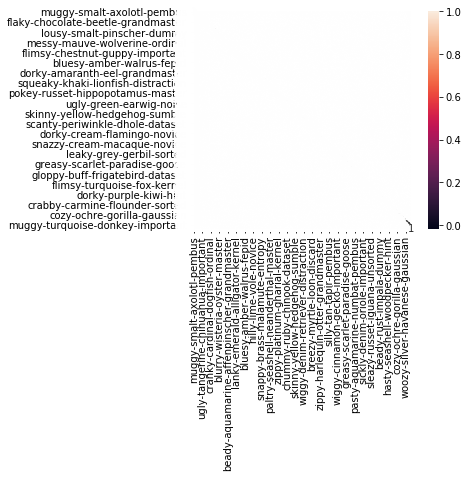

In [10]:
sns.heatmap(corr, square=True, annot=True)